In [36]:
## 本文根据司守奎的<数学建模算法与应用>整理写下的学习笔记.鉴于文章中使用的基本是matlab软件,而本人想提高一下使用Python进行编程的能力,所以使用Python进行编程
## 代码基于anaconda的Python3.8.8环境进行编程
## 编码使用 --UTF-8--

# 第一章 线性规划

In [37]:
# 例1
# 某机床生产甲,乙两种机床,每台机床销售后的利润分别为4千元和3千元.
# 生产甲机床需用A,B及其加工,加工时间分别为每台2h和每台1h;生产乙机床需要A,B,C三台机器加工,加工时间均为每台1h
# 若每天可用于加工的机器时数分别为A机器10h,B机器8h和C机器7h,问该厂应生产甲,乙机床各多少台才能使总利润最大

# 分析
# 题目中目标是使得总利润z=4*x1+3*x2取得最大值
# 可写出约束条件
# 2*x1+x2<=10
# x1+x2<=8
# x2<=7
# x1,x2为正整数
from scipy import optimize  # 使用scipy库求解
import pulp as pp           # 使用pulp库求解
import numpy as np
import matplotlib.pyplot as plt # 使用matplotlib插件绘图

In [38]:
c = np.array([4,3])#不等式约束
A = np.array([[2,1],[1,1],[0,1]])
B = np.array([10,8,7])
Aeq = np.array([[0,0]]) #等式约束
Beq = np.array([0])
x1=(0,None)#参数范围约束
x2=(0,None)
# 注:线性规划中不等式关系参数需要全部转为'<='形式,即为标准型
# 结果
res = optimize.linprog(-c,A,B,Aeq,Beq,bounds=(x1,x2))
res.fun*=-1
res


     con: array([0.])
     fun: 25.99999999984096
 message: 'Optimization terminated successfully.'
     nit: 5
   slack: array([8.03410671e-11, 3.93507449e-11, 1.00000000e+00])
  status: 0
 success: True
       x: array([2., 6.])

In [39]:
# 使用pulp包进行求解
ProbLP1 = pp.LpProblem('ProbLP1',sense=pp.LpMaximize)
x1 = pp.LpVariable('x1',lowBound=0,cat='integer')
x2 = pp.LpVariable('x2',lowBound=0,upBound=7,cat='integer')
#‘Continuous’ 表示连续变量（默认值）、’ Integer ’ 表示离散变量（用于整数规划问题）、’ Binary ’ 表示0/1变量（用于0/1规划问题）
ProbLP1 += (4*x1+3*x2) #目标函数
ProbLP1 += (2*x1+x2<=10)    #设置约束条件
ProbLP1 += (x1+x2<=8)
ProbLP1.solve()
print(ProbLP1.name)  # 输出求解状态
print("Status:", pp.LpStatus[ProbLP1.status])  # 输出求解状态
for v in ProbLP1.variables():
    print(v.name, "=", v.varValue)  # 输出每个变量的最优值
print("F1(x) =", pp.value(ProbLP1.objective))  # 输出最优解的目标函数值

# 总结,不难看出,使用pulp包相比于scipy包来说,速度更快,并且更方便使用易上手.
# 在matlab中,这分为基于求解器求解和基于问题求解,意思差不多

ProbLP1
Status: Optimal
x1 = 2.0
x2 = 6.0
F1(x) = 26.0


In [40]:
## 本程序是基于绝对值问题的求解
ProbLP2 = pp.LpProblem('ProbLP2',sense=pp.LpMinimize)
u1 = pp.LpVariable('u1',lowBound=0,cat='continuous')
u2 = pp.LpVariable('u2',lowBound=0,cat='continuous')
u3 = pp.LpVariable('u3',lowBound=0,cat='continuous')
u4 = pp.LpVariable('u4',lowBound=0,cat='continuous')
v1 = pp.LpVariable('v1',lowBound=0,cat='continuous')
v2 = pp.LpVariable('v2',lowBound=0,cat='continuous')
v3 = pp.LpVariable('v3',lowBound=0,cat='continuous')
v4 = pp.LpVariable('v4',lowBound=0,cat='continuous')

ProbLP2 += ((u1+v1)+2*(u2+v2)+3*(u3+v3)+4*(u4+v4)) #目标函数
ProbLP2 += ((u1-v1)-(u2-v2)-(u3-v3)-(u4-v4)<=-2)    #设置约束条件
ProbLP2 += ((u1-v1)-(u2-v2)+(u3-v3)-3*(u4-v4)<=-1)
ProbLP2 += ((u1-v1)-(u2-v2)-2*(u3-v3)+3*(u4-v4)<=-0.5)
ProbLP2.solve()

print(ProbLP2.name)  # 输出求解状态
print("Status:", pp.LpStatus[ProbLP2.status])  # 输出求解状态
print("x1 =", u1.varValue-v1.varValue)  # 输出每个变量的最优值
print("x2 =", u2.varValue-v2.varValue)  # 输出每个变量的最优值
print("x3 =", u3.varValue-v3.varValue)  # 输出每个变量的最优值
print("x4 =", u4.varValue-v4.varValue)  # 输出每个变量的最优值
print("F2(x) =", pp.value(ProbLP2.objective))  # 输出最优解的目标函数值

ProbLP2
Status: Optimal
x1 = -2.0
x2 = 0.0
x3 = 0.0
x4 = 0.0
F2(x) = 2.0


In [41]:
## 风险与收益投资问题
M=10000
c = np.array([0.05,0.27,0.19,0.185,0.185])#不等式约束
A = np.array([[0,0.025,0,0,0],[0,0,0.015,0,0],[0,0,0,0.055,0],[0,0,0,0,0.026]])

Aeq = np.array([[1,1.01,1.02,1.045,1.065]]) #等式约束
Beq = np.array([M])
x1=(0,None)#参数范围约束
Fin=np.array([])
for a in np.arange(0,0.05,0.002):
    B = np.array([a*M,a*M,a*M,a*M])
# 结果
    res = optimize.linprog(-c,A,B,Aeq,Beq,bounds=(x1,x1,x1,x1,x1))
    Fin=np.append(Fin,-res.fun)
Fin

array([ 499.99999995, 1010.55221445, 1521.1044289 , 2019.07639777,
       2112.43381146, 2190.19607786, 2255.68627447, 2321.17645993,
       2386.66666666, 2452.15686264, 2517.64705881, 2583.1372549 ,
       2648.6274509 , 2673.26732641, 2673.26731259, 2673.26732669,
       2673.26732665, 2673.26732659, 2673.2672357 , 2673.26732671,
       2673.26732671, 2673.26732556, 2673.26732281, 2673.26732673,
       2673.26732673])

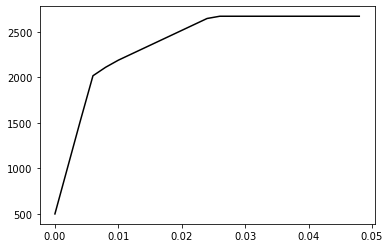

In [42]:
fig = plt.figure(1)
ax1 = plt.subplot(1,1,1)
x = np.arange(0,0.05,0.002)
y=Fin
Line=plt.plot(x,y)
plt.setp(Line,color='k')
plt.show()